In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pyceptron import DoubleLayerPerceptron

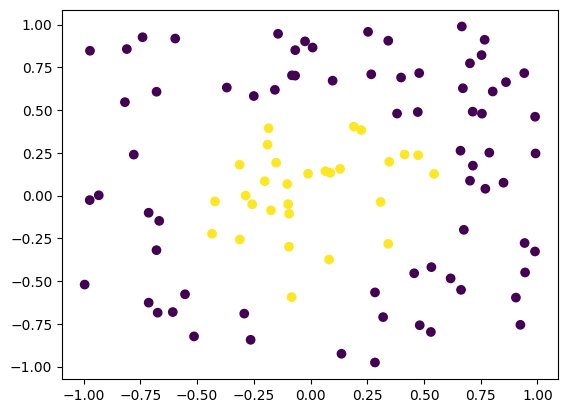

In [10]:
# Read data from circle separable dataset
ds = pd.read_csv("data/circle.csv", names=["x1", "x2", "y"])

# Split data into input and output
x_inp = ds[["x1", "x2"]].to_numpy()
y_out = ds["y"].to_numpy()

# Plot the data points with different colors
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
plt.show()


In [11]:
# Check the shape of the input and output
print(x_inp.shape, y_out.shape)


(100, 2) (100,)


In [12]:
# Define the network size
n_input = 2
n_hidden = 10
n_output = 1

# Create a double-layer perceptron
dlp = DoubleLayerPerceptron(n_input, n_hidden, n_output)

# Train the model
dlp.fit(x_inp, y_out, iters=1000, eta=0.1)


Iteration:    1, Error: 1.13147457e+01
Iteration:    2, Error: 1.02069998e+01
Iteration:    3, Error: 1.01258385e+01
Iteration:    4, Error: 1.00542945e+01
Iteration:    5, Error: 9.99039977e+00
Iteration:    6, Error: 9.93381154e+00
Iteration:    7, Error: 9.88268934e+00
Iteration:    8, Error: 9.83781852e+00
Iteration:    9, Error: 9.79673200e+00
Iteration:   10, Error: 9.76287557e+00
Iteration:   11, Error: 9.73095043e+00
Iteration:   12, Error: 9.71218029e+00
Iteration:   13, Error: 9.69021098e+00
Iteration:   14, Error: 9.70143447e+00
Iteration:   15, Error: 9.68626270e+00
Iteration:   16, Error: 9.76207944e+00
Iteration:   17, Error: 9.71755611e+00
Iteration:   18, Error: 9.89614585e+00
Iteration:   19, Error: 9.72558287e+00
Iteration:   20, Error: 9.97820379e+00
Iteration:   21, Error: 9.68412541e+00
Iteration:   22, Error: 9.95278684e+00
Iteration:   23, Error: 9.64463603e+00
Iteration:   24, Error: 9.92961076e+00
Iteration:   25, Error: 9.60517655e+00
Iteration:   26, Error: 9

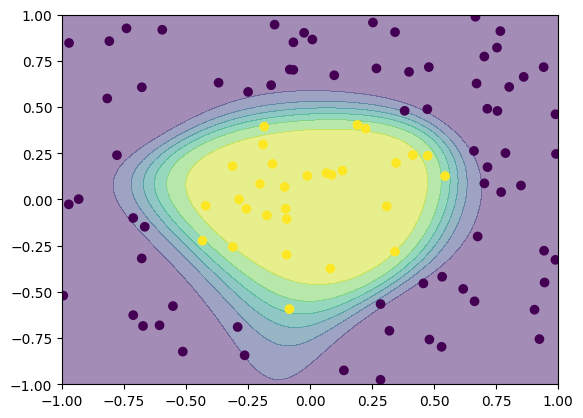

In [13]:
# Validate the model in [-1,1]^2
NUM_POINTS = 100
x1 = np.linspace(-1, 1, NUM_POINTS)
x2 = np.linspace(-1, 1, NUM_POINTS)
x1, x2 = np.meshgrid(x1, x2)

# Flatten and stack the data to predict
validation_data = np.vstack([x1.flatten(), x2.flatten()])
pred = dlp.predict(validation_data)

# Plot the meshgrid with the prediction
plt.contourf(x1, x2, pred.reshape(x1.shape), alpha=0.5)
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
plt.show()


Iteration:    1, Error: 1.06906796e+01
Iteration:    2, Error: 1.06000832e+01
Iteration:    3, Error: 1.05210773e+01
Iteration:    4, Error: 1.04516326e+01
Iteration:    5, Error: 1.03904397e+01
Iteration:    6, Error: 1.03363560e+01
Iteration:    7, Error: 1.02883748e+01
Iteration:    8, Error: 1.02456109e+01
Iteration:    9, Error: 1.02072875e+01
Iteration:   10, Error: 1.01727250e+01
Iteration:   11, Error: 1.01413304e+01
Iteration:   12, Error: 1.01125874e+01
Iteration:   13, Error: 1.00860476e+01
Iteration:   14, Error: 1.00613228e+01
Iteration:   15, Error: 1.00380775e+01
Iteration:   16, Error: 1.00160220e+01
Iteration:   17, Error: 9.99490685e+00
Iteration:   18, Error: 9.97451743e+00
Iteration:   19, Error: 9.95466889e+00
Iteration:   20, Error: 9.93520212e+00
Iteration:   21, Error: 9.91598000e+00
Iteration:   22, Error: 9.89688411e+00
Iteration:   23, Error: 9.87781190e+00
Iteration:   24, Error: 9.85867422e+00
Iteration:   25, Error: 9.83939321e+00
Iteration:   26, Error: 9

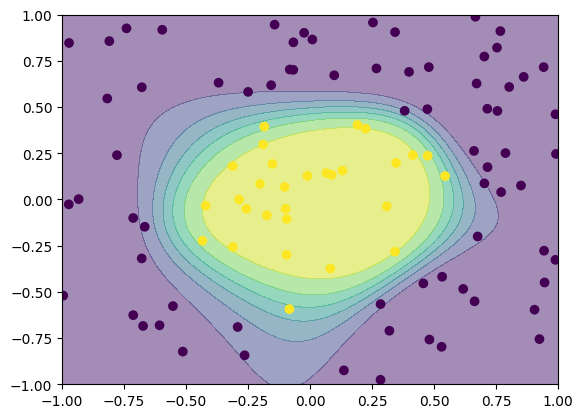

In [14]:
# Recreate the experiment with the multi-layer perceptron
from pyceptron import MultiLayerPerceptron

# Create a multi-layer perceptron
mlp = MultiLayerPerceptron([n_input, n_hidden, n_output])

# Train the model
mlp.fit(x_inp, y_out, iters=1000, eta=0.1)

# Validate the model in [-1,1]^2
pred = mlp.predict(validation_data)

# Plot the meshgrid with the prediction
plt.contourf(x1, x2, pred.reshape(x1.shape), alpha=0.5)
plt.scatter(x_inp[:, 0], x_inp[:, 1], c=y_out)
